In [1]:
# Imports and setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "./Online-Retail-France.xlsx"

In [2]:
#1. Import data
df = pd.read_excel(url)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0


In [3]:
#1. Show size
rows, cols = df.shape
print(f"the df has {rows} rows and {cols} columns")

the df has 8557 rows and 7 columns


In [4]:
#2. print number of unique desc
print(f"There are {df['Description'].nunique()} unique 'Description' items")

There are 1565 unique 'Description' items


In [5]:
#3. cleaning data
df['Description'] = df['Description'].str.strip()
print(f"There are {df['Description'].nunique()} unique 'Description' items")

There are 1564 unique 'Description' items


In [6]:
#4. Remove empty InvoceNo
df = df[df['InvoiceNo'].notna()]

rows, cols = df.shape
print(f"the df has {rows} rows and {cols} columns")

the df has 8557 rows and 7 columns


In [7]:
# No changes in df

In [8]:
#5. Remove InvoiceNo for credit transaction (start with "C")
df = df[df['InvoiceNo'].str.startswith('C')==False]

rows, cols = df.shape
print(f"the df has {rows} rows and {cols} columns")

the df has 8408 rows and 7 columns


In [9]:
#6. Remove POSTAGE
df = df[df['Description'].str.contains("POSTAGE")==False]

rows, cols = df.shape
print(f"the df has {rows} rows and {cols} columns")

the df has 8108 rows and 7 columns


In [10]:
# 7. group by InvoiceNo and Description, sum on Quantity
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
# Unstack to move items from rows to columns
# reset_index to reset index
# fillna(0) to fill the missig with zeroes
basket = basket.unstack().reset_index().fillna(0)
basket.head()

Description,InvoiceNo,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
0,536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# 8. convert positive values to True and negatives to False
basket = basket.set_index('InvoiceNo')
#basket.head()

In [12]:
basket = basket > 0
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536852,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536974,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537065,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# 9.
from mlxtend.frequent_patterns import apriori, association_rules

min_support = 1
rules = []
target_rule_count = 20
step = 0.01

while min_support > 0:
    frequent_itemset = apriori(
        basket,
        min_support,
        use_colnames=True
    )

    if not frequent_itemset.empty:
        rules = association_rules(
            frequent_itemset,
        )

    if len(rules) >= target_rule_count:
        break

    min_support -= step
print(rules)
print(f"\nmin_support={min_support:.2f} produced {len(rules)} rules.")


                                          antecedents  \
0                          (ALARM CLOCK BAKELIKE RED)   
1                        (ALARM CLOCK BAKELIKE GREEN)   
2                        (CHILDRENS CUTLERY SPACEBOY)   
3                      (CHILDRENS CUTLERY DOLLY GIRL)   
4                           (SPACEBOY CHILDRENS BOWL)   
5                         (DOLLY GIRL CHILDRENS BOWL)   
6                    (MINI LIGHTS WOODLAND MUSHROOMS)   
7                    (PACK OF 20 SKULL PAPER NAPKINS)   
8                    (PACK OF 20 SKULL PAPER NAPKINS)   
9                        (PACK OF 6 SKULL PAPER CUPS)   
10                     (PACK OF 6 SKULL PAPER PLATES)   
11                    (SET/6 RED SPOTTY PAPER PLATES)   
12                    (SET/6 RED SPOTTY PAPER PLATES)   
13                      (SET/6 RED SPOTTY PAPER CUPS)   
14  (ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...   
15  (ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...   
16  (ALARM CLOCK BAKELIKE GREEN

In [14]:
# 10. generate association rules using metric=lift and min threshold = 1

metric = 'lift'
min_threshold = 1

min_support = 1
rules = []
target_rule_count = 20
step = 0.01

while min_support > 0:
    frequent_itemset = apriori(
        basket,
        min_support,
        use_colnames=True
    )

    if not frequent_itemset.empty:
        rules = association_rules(
            frequent_itemset,
            metric=metric,
            min_threshold=min_threshold
        )

    if len(rules) >= target_rule_count:
        break

    min_support -= step


print(rules)
print(f"\nmin_support={min_support:.2f} using metric={metric} and min_threshold={min_threshold}, produced {len(rules)} rules.")

                                          antecedents  \
0                          (ALARM CLOCK BAKELIKE RED)   
1                        (ALARM CLOCK BAKELIKE GREEN)   
2                          (PLASTERS IN TIN SPACEBOY)   
3                     (PLASTERS IN TIN CIRCUS PARADE)   
4                     (PLASTERS IN TIN CIRCUS PARADE)   
5                  (PLASTERS IN TIN WOODLAND ANIMALS)   
6                          (PLASTERS IN TIN SPACEBOY)   
7                  (PLASTERS IN TIN WOODLAND ANIMALS)   
8                (SET/20 RED RETROSPOT PAPER NAPKINS)   
9                       (SET/6 RED SPOTTY PAPER CUPS)   
10               (SET/20 RED RETROSPOT PAPER NAPKINS)   
11                    (SET/6 RED SPOTTY PAPER PLATES)   
12                    (SET/6 RED SPOTTY PAPER PLATES)   
13                      (SET/6 RED SPOTTY PAPER CUPS)   
14  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
15  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
16  (SET/6 RED SPOTTY PAPER PLA

In [15]:
# 11. Sorting on desc lift and confidence

rules.sort_values(by=['lift', 'confidence'], ascending=False, inplace=True)
#rules.head()

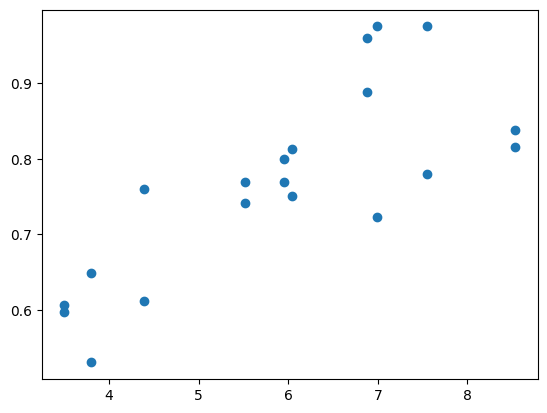

In [16]:
# Scatter plot
plt.scatter(rules['lift'], rules['confidence'])
plt.show()